In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regression as reg
from scipy import stats
from matplotlib import pyplot as plt
import pickle
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
from graph_tool import centrality

In [2]:
metrics = pd.read_csv("metricas.csv")

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [3]:
metrics

,Unnamed: 0,Symbol,1Y Return,1Y Volatility,1Y Sharpe,betweenness,clustering,coreness,Antifragile
0,0,AADR,-0.251947,0.250346,-1.006395,0.000000e+00,1.000000,0.000000,3.994467
1,1,AAXJ,-0.337440,0.232847,-1.449193,1.561412e-03,0.984460,0.032114,4.294664
2,2,ACIO,-0.060124,0.148824,-0.403993,2.091486e-04,0.937659,0.000000,6.719324
3,3,ACSI,-0.148065,0.238942,-0.619667,0.000000e+00,0.000000,0.000000,4.185110
4,4,ACTV,-0.181677,0.242953,-0.747787,1.147261e-07,0.999790,0.094315,4.116024
...,...,...,...,...,...,...,...,...,...
1436,1436,YLD,-0.091160,0.082317,-1.107423,2.775901e-03,0.996104,0.102611,12.148164
1437,1437,YLDE,-0.082411,0.187182,-0.440271,1.050044e-04,0.969227,0.101859,5.342398
1438,1438,YPS,-0.135272,0.230933,-0.585763,1.659611e-04,0.893746,0.728385,4.330265
1439,1439,ZHDG,-0.162616,0.136425,-1.191983,2.620599e-04,0.878619,0.989736,7.330057


In [4]:
metrics["Return"] = metrics["1Y Return"]
metrics["Volatility"] = metrics["1Y Volatility"]
metrics["Sharpe"] = metrics["1Y Sharpe"]


# Analise de Residuos

### Modelo A

In [5]:
result = reg.linear(data=metrics, formula='Volatility ~ coreness + np.power(Return,2)')


result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.018787,0.007912,0.017702
"np.power(Return, 2)",1.135323,0.037782,0.000000


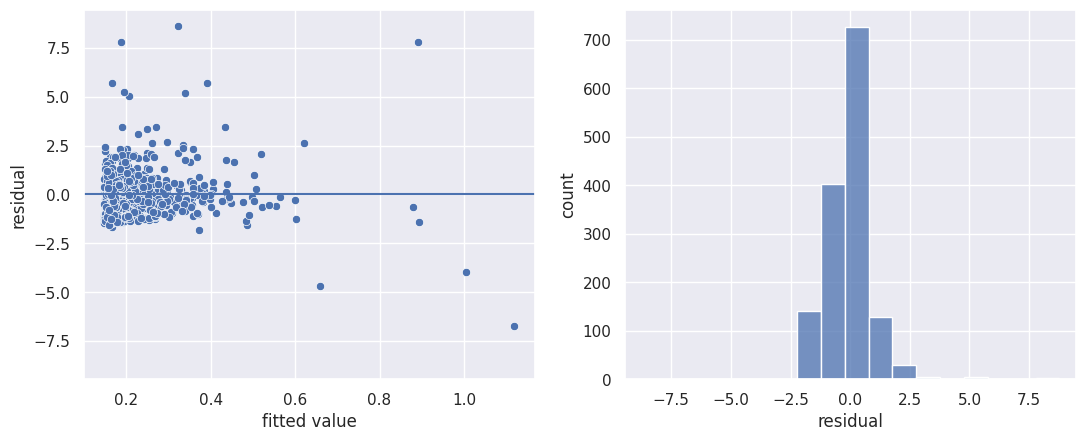

In [6]:
# result.plot_residuals(metrics["Return"])
result.plot_residuals()

### Modelo B

In [7]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.power(Return, 2)')

result.micro_summary()

variable,coefficient,std error,p-value
betweenness,5.792164,6.018828,0.336040
"np.power(Return, 2)",1.130312,0.037774,0.000000


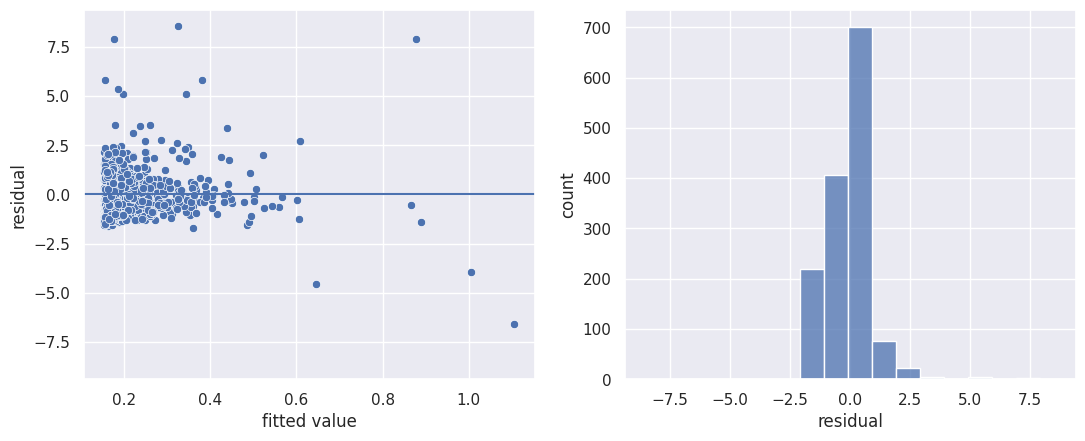

In [8]:
# result.plot_residuals(metrics["Return"])
# result.plot_residuals(metrics["betweenness"])

result.plot_residuals()

### Modelo C

In [9]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.power(Return, 2) + coreness')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,5.266195,6.013686,0.381339
"np.power(Return, 2)",1.136397,0.037805,0.000000
coreness,0.018528,0.007918,0.019423


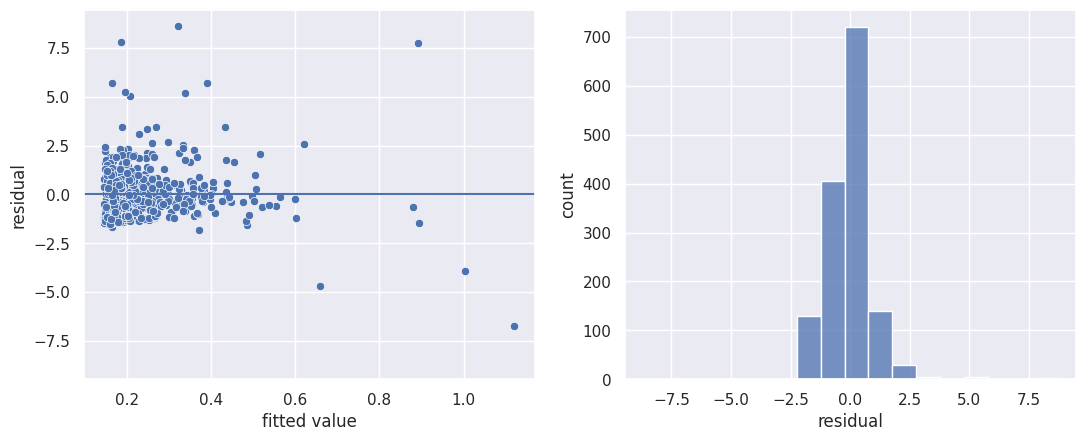

In [10]:
result.plot_residuals()
# result.plot_residuals(metrics["Return"])

### Modelo D

In [46]:
result = reg.linear(data=metrics, formula='Return ~ clustering')
result.micro_summary()

variable,coefficient,std error,p-value
clustering,-0.032148,0.031239,0.303607


In [47]:
# metrics.clustering.hist()
# plt.show()

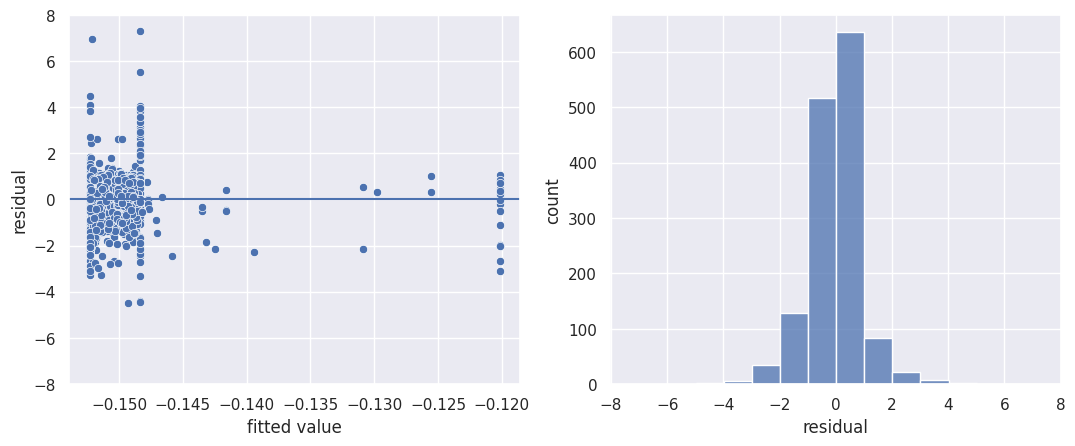

In [48]:
result.plot_residuals()

In [15]:
metrics["fitted"] = result.fittedvalues

In [16]:
metrics

,Unnamed: 0,Symbol,1Y Return,1Y Volatility,1Y Sharpe,betweenness,clustering,coreness,Antifragile,Return,Volatility,Sharpe,fitted
0,0,AADR,-0.251947,0.250346,-1.006395,0.000000e+00,1.000000,0.000000,3.994467,-0.251947,0.250346,-1.006395,-0.152309
1,1,AAXJ,-0.337440,0.232847,-1.449193,1.561412e-03,0.984460,0.032114,4.294664,-0.337440,0.232847,-1.449193,-0.151809
2,2,ACIO,-0.060124,0.148824,-0.403993,2.091486e-04,0.937659,0.000000,6.719324,-0.060124,0.148824,-0.403993,-0.150305
3,3,ACSI,-0.148065,0.238942,-0.619667,0.000000e+00,0.000000,0.000000,4.185110,-0.148065,0.238942,-0.619667,-0.120161
4,4,ACTV,-0.181677,0.242953,-0.747787,1.147261e-07,0.999790,0.094315,4.116024,-0.181677,0.242953,-0.747787,-0.152302
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,1436,YLD,-0.091160,0.082317,-1.107423,2.775901e-03,0.996104,0.102611,12.148164,-0.091160,0.082317,-1.107423,-0.152184
1437,1437,YLDE,-0.082411,0.187182,-0.440271,1.050044e-04,0.969227,0.101859,5.342398,-0.082411,0.187182,-0.440271,-0.151320
1438,1438,YPS,-0.135272,0.230933,-0.585763,1.659611e-04,0.893746,0.728385,4.330265,-0.135272,0.230933,-0.585763,-0.148893
1439,1439,ZHDG,-0.162616,0.136425,-1.191983,2.620599e-04,0.878619,0.989736,7.330057,-0.162616,0.136425,-1.191983,-0.148407


In [17]:
metrics.loc[metrics.fitted > -0.135]

,Unnamed: 0,Symbol,1Y Return,1Y Volatility,1Y Sharpe,betweenness,clustering,coreness,Antifragile,Return,Volatility,Sharpe,fitted
3,3,ACSI,-0.148065,0.238942,-0.619667,0.000000,0.000000,0.000000,4.185110,-0.148065,0.238942,-0.619667,-0.120161
142,142,CBLS,-0.115571,0.199982,-0.577906,0.000000,0.000000,0.000000,5.000439,-0.115571,0.199982,-0.577906,-0.120161
216,216,DIA,-0.065225,0.192588,-0.338677,0.000000,0.000000,0.000000,5.192442,-0.065225,0.192588,-0.338677,-0.120161
229,229,DPST,-0.410083,0.847456,-0.483899,0.000000,0.000000,0.000000,1.180002,-0.410083,0.847456,-0.483899,-0.120161
255,255,EBIZ,-0.511320,0.424484,-1.204570,0.000000,0.000000,0.000000,2.355804,-0.511320,0.424484,-1.204570,-0.120161
287,287,EMCB,-0.191144,0.086689,-2.204941,0.000000,0.000000,0.000000,11.535466,-0.191144,0.086689,-2.204941,-0.120161
299,299,EPI,-0.083417,0.201841,-0.413280,0.006927,0.300000,0.003350,4.954396,-0.083417,0.201841,-0.413280,-0.129805
439,439,FMAT,-0.104238,0.246091,-0.423576,0.000000,0.000000,0.002198,4.063540,-0.104238,0.246091,-0.423576,-0.120161
474,474,FSTA,0.036171,0.172949,0.209143,0.000000,0.000000,0.000000,5.782053,0.036171,0.172949,0.209143,-0.120161
558,558,GXC,-0.442830,0.365773,-1.210668,0.001389,0.333333,0.000000,2.733936,-0.442830,0.365773,-1.210668,-0.130877


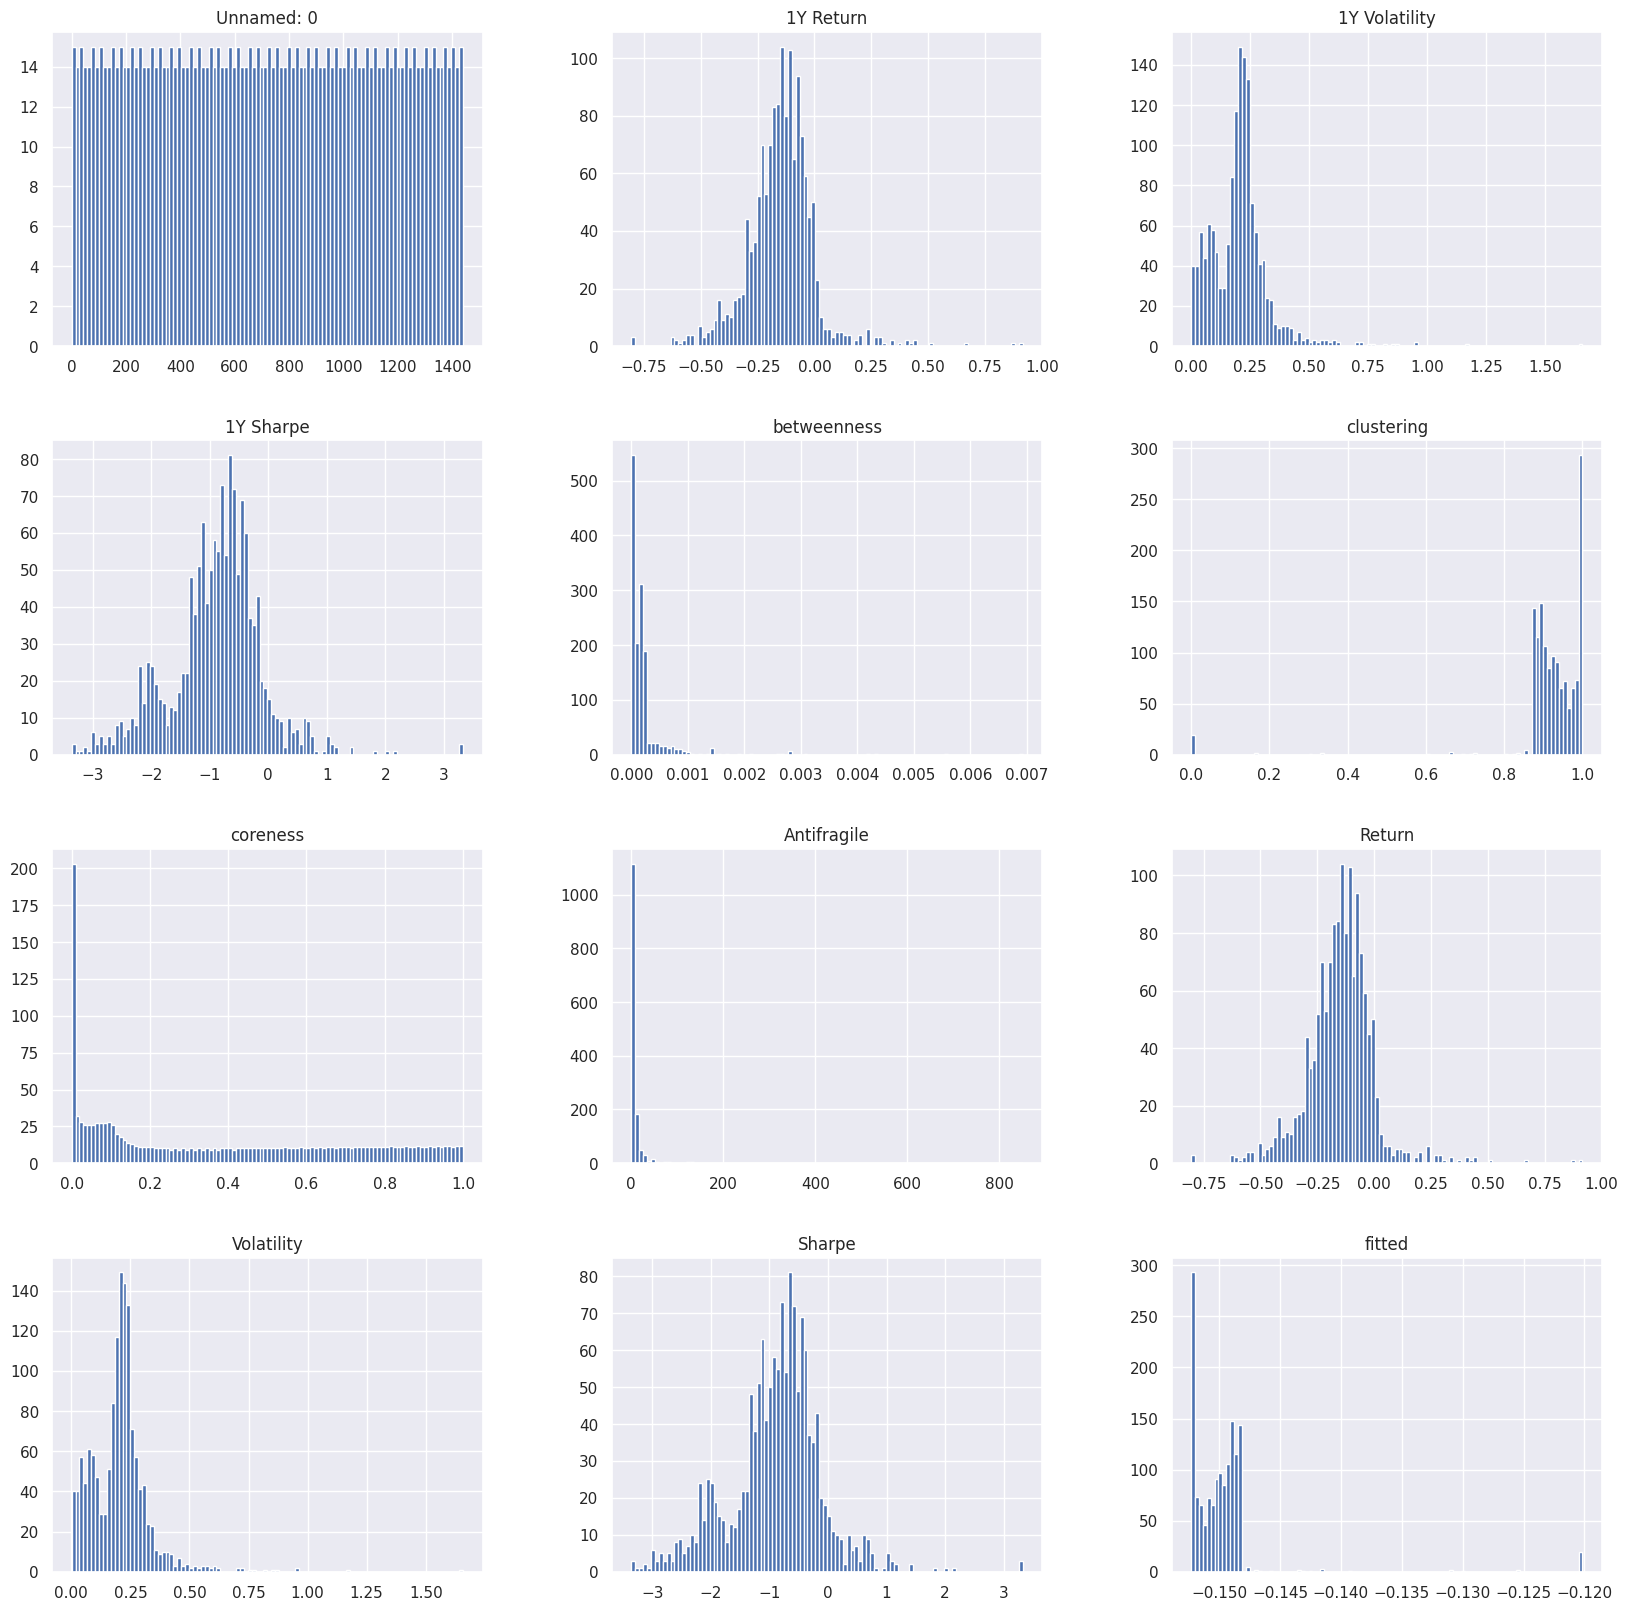

In [18]:
metrics.hist(bins=100, figsize=(20,20))
plt.show()

In [19]:
upper_limit = metrics["Volatility"].mean()+metrics["Volatility"].std()
lower_limit = metrics["Volatility"].mean()-metrics["Volatility"].std()

In [20]:
metrics_limited_volatility = metrics.loc[(metrics["Volatility"] < upper_limit) & (metrics["Volatility"] >= lower_limit)].count()
metrics_limited_volatility

Unnamed: 0       1089
Symbol           1089
1Y Return        1089
1Y Volatility    1089
1Y Sharpe        1089
betweenness      1089
clustering       1089
coreness         1089
Antifragile      1089
Return           1089
Volatility       1089
Sharpe           1089
fitted           1089
dtype: int64

In [21]:
metrics.std()

/tmp/ipykernel_103/1323820197.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  metrics.std()


Unnamed: 0       416.125181
1Y Return          0.146057
1Y Volatility      0.125481
1Y Sharpe          0.784679
betweenness        0.000432
clustering         0.123207
coreness           0.328589
Antifragile       37.695481
Return             0.146057
Volatility         0.125481
Sharpe             0.784679
fitted             0.003961
dtype: float64

# Centro X Antifragilidade

In [22]:
metrics["coreness"].describe()

count    1441.000000
mean        0.382450
std         0.328589
min         0.000000
25%         0.067358
50%         0.321525
75%         0.679262
max         1.000000
Name: coreness, dtype: float64

<AxesSubplot: >

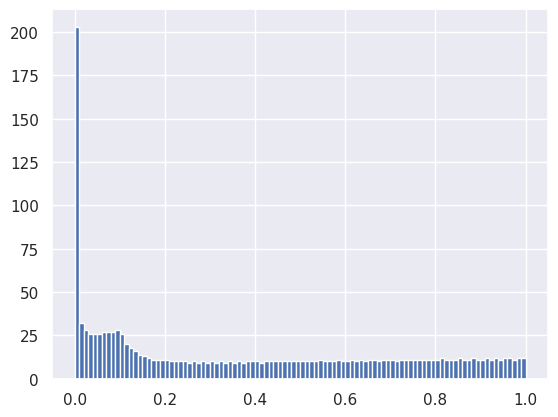

In [23]:
metrics["coreness"].hist(bins=100)

In [24]:
result = stats.linregress(x=metrics['coreness'], y=metrics['1Y Volatility'])

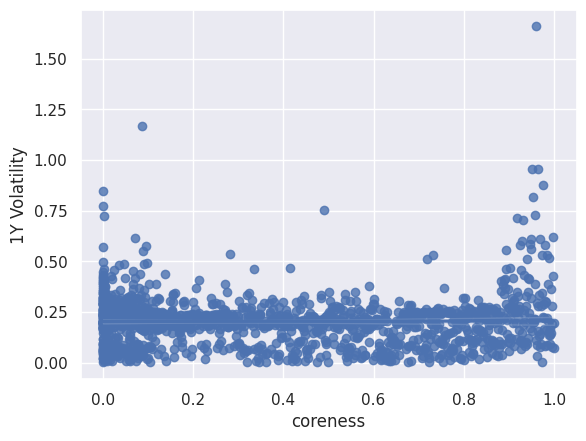

In [25]:
sns.regplot(x=metrics['coreness'], y=metrics['1Y Volatility']);

In [26]:
result.pvalue

0.8328860101744462

In [27]:
result

LinregressResult(slope=0.0021244680518953092, intercept=0.20341555078654866, rvalue=0.005563235890645498, pvalue=0.8328860101744462, stderr=0.010066664891097386, intercept_stderr=0.005075074506314441)

# Intermediário X Antifragilidade

In [28]:
metrics["betweenness"].describe()

count    1441.000000
mean        0.000210
std         0.000432
min         0.000000
25%         0.000018
50%         0.000126
75%         0.000228
max         0.006927
Name: betweenness, dtype: float64

<AxesSubplot: >

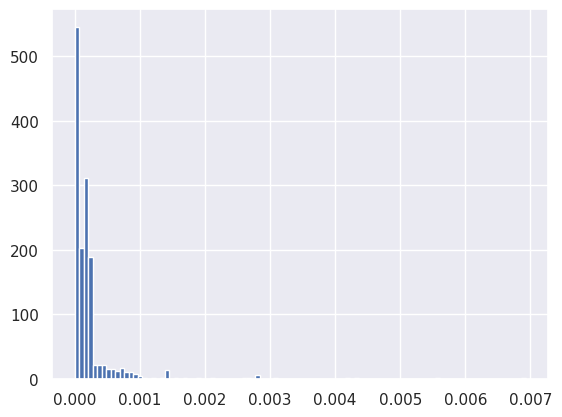

In [29]:
metrics["betweenness"].hist(bins=100)

In [30]:
test = metrics[metrics["betweenness"] <  metrics["betweenness"].mean() + metrics["betweenness"].std()]

In [31]:
result = stats.linregress(x=test['betweenness'], y=np.log(test['Antifragile']))

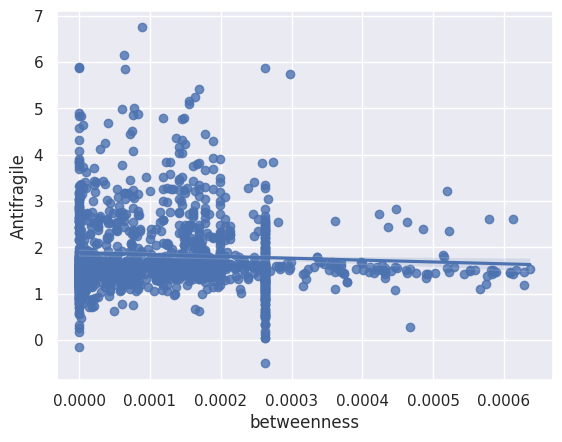

In [32]:
sns.regplot(x=test['betweenness'], y=np.log(test['Antifragile']));

In [33]:
result.pvalue

0.026990795658410133

In [34]:
result

LinregressResult(slope=-401.0103939093004, intercept=1.885266109935337, rvalue=-0.06023932533600369, pvalue=0.026990795658410133, stderr=181.11882341805494, intercept_stderr=0.032736672733554545)

# Similaridade X Rentabilidade

Fundos similares compartilham ativos com outros e provavelmente não possuem uma estratégia muito única. Devido à isso, tendem a seguir grandes players do mercado, sem alterar de maneira significativa essas estratégias, gerando um risco menor, mas reduzindo a possibilidade de um alto retorno.

In [35]:
metrics["clustering"].describe()

count    1441.000000
mean        0.920052
std         0.123207
min         0.000000
25%         0.893746
50%         0.928754
75%         0.980957
max         1.000000
Name: clustering, dtype: float64

<AxesSubplot: >

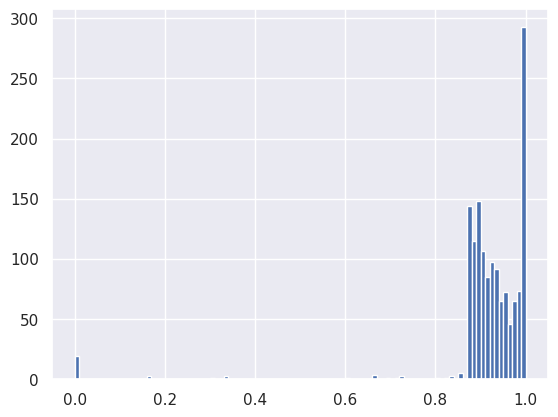

In [36]:
metrics["clustering"].hist(bins=100)

In [37]:
test = metrics[metrics["clustering"] > metrics["clustering"].mean() - metrics["clustering"].std()]

In [38]:
result = stats.linregress(x=test['clustering'], y=test['1Y Return'])

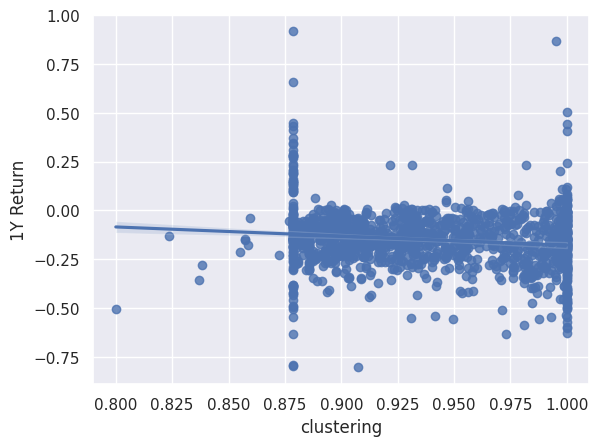

In [39]:
sns.regplot(x=test['clustering'], y=test['1Y Return']);

In [40]:
result.pvalue

8.44246631780537e-08

In [41]:
result

LinregressResult(slope=-0.46800151609069335, intercept=0.2893623834249627, rvalue=-0.1421257623461291, pvalue=8.44246631780537e-08, stderr=0.08689527879181033, intercept_stderr=0.08143689264508137)

# Rentabilidade X Antifragilidade

In [42]:
result = stats.linregress(x=metrics['1Y Return'], y=metrics['1Y Volatility'])

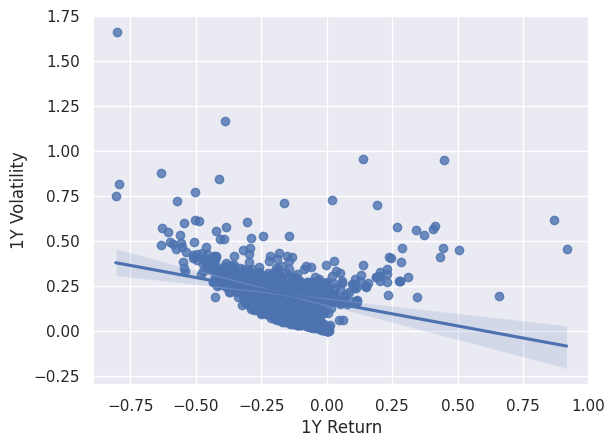

In [43]:
sns.regplot(x=metrics['1Y Return'], y=metrics['1Y Volatility']);

In [44]:
result.pvalue

4.804477573368827e-34

In [45]:
result

LinregressResult(slope=-0.26860751212902045, intercept=0.1640070782952377, rvalue=-0.31265496029305284, pvalue=4.804477573368827e-34, stderr=0.021512214899699914, intercept_stderr=0.00449907136005348)